# Guided Project: Predicting Car Prices

## 1. Exploratory Data Analysis EDA

In this guided project, you'll practice the machine learning workflow you've learned so far to predict a car's market price using its attributes. The data set we will be working with contains information on various cars. For each car we have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more. 

https://archive.ics.uci.edu/ml/datasets/automobile

Attribute: Attribute Range 

1. symboling: -3, -2, -1, 0, 1, 2, 3. 
2. normalized-losses: continuous from 65 to 256. 
3. make: 
alfa-romero, audi, bmw, chevrolet, dodge, honda, 
isuzu, jaguar, mazda, mercedes-benz, mercury, 
mitsubishi, nissan, peugot, plymouth, porsche, 
renault, saab, subaru, toyota, volkswagen, volvo 

4. fuel-type: diesel, gas. 
5. aspiration: std, turbo. 
6. num-of-doors: four, two. 
7. body-style: hardtop, wagon, sedan, hatchback, convertible. 
8. drive-wheels: 4wd, fwd, rwd. 
9. engine-location: front, rear. 
10. wheel-base: continuous from 86.6 120.9. 
11. length: continuous from 141.1 to 208.1. 
12. width: continuous from 60.3 to 72.3. 
13. height: continuous from 47.8 to 59.8. 
14. curb-weight: continuous from 1488 to 4066. 
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor. 
16. num-of-cylinders: eight, five, four, six, three, twelve, two. 
17. engine-size: continuous from 61 to 326. 
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi. 
19. bore: continuous from 2.54 to 3.94. 
20. stroke: continuous from 2.07 to 4.17. 
21. compression-ratio: continuous from 7 to 23. 
22. horsepower: continuous from 48 to 288. 
23. peak-rpm: continuous from 4150 to 6600. 
24. city-mpg: continuous from 13 to 49. 
25. highway-mpg: continuous from 16 to 54. 
26. price: continuous from 5118 to 45400.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read data into dataframe
column_names=['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','wheel-base','length','width','height','curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']
cars=pd.read_csv('imports-85.data',names=column_names)
cars

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.00,160,5500,16,22,?


In [3]:
print('Shape:')
print(cars.shape)
print('Info:')
print(cars.info())

Shape:
(205, 26)
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-ratio    205 non-null float64
horsepowe

In [4]:
#Determine which columns are numeric and can be used as features
column_int64=['symboling','curb-weight','engine-size','city-mpg','highway-mpg']
column_float64=['wheel-base','length','width','height','compression-ratio']

#Non numeric columnns
column_object=['normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','engine-type','num-of-cylinders','fuel-system','bore','stroke','horsepower','peak-rpm','price']

#Determine which columns are numeric and which column is the target column.
"cars['price']"

"cars['price']"

column_object that need to be converted:
<li>symboling => integer
<li>normalized_losses => integer
<li>num_cylinders => from text to integer
<li>bore => float
<li>stroke => float
<li>horsepower => integer
<li>peak_rpm => integer
<li>price => integer

In [5]:
# Select only the columns with continuous values from - https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.names
continuous_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
numeric_cars = cars[continuous_values_cols].copy()
numeric_cars

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.00,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.00,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.00,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.00,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.00,115,5500,18,22,17450
5,?,99.8,177.3,66.3,53.1,2507,3.19,3.40,8.50,110,5500,19,25,15250
6,158,105.8,192.7,71.4,55.7,2844,3.19,3.40,8.50,110,5500,19,25,17710
7,?,105.8,192.7,71.4,55.7,2954,3.19,3.40,8.50,110,5500,19,25,18920
8,158,105.8,192.7,71.4,55.9,3086,3.13,3.40,8.30,140,5500,17,20,23875
9,?,99.5,178.2,67.9,52.0,3053,3.13,3.40,7.00,160,5500,16,22,?


# 2. Data Cleaning

As we learned in this course, we usually can't have any missing values if we want to use them for predictive modeling. Based on the data set preview from the last step, we can tell that the normalized-losses column contains missing values represented using "?". Let's replace these values and look for the presence of missing values in other numeric columns. Let's also rescale the values in the numeric columns so they all range from 0 to 1.

In [6]:
#Use the DataFrame.replace() method to replace all of the ? values with the numpy.nan missing value.
numeric_cars=numeric_cars.replace('?',np.nan)

In [7]:
#Determine which columns need to be converted to numeric types. You can use either the DataFrame.astype() or the Series.astype() methods to convert column types.
numeric_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
normalized-losses    164 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
bore                 201 non-null object
stroke               201 non-null object
compression-ratio    205 non-null float64
horsepower           203 non-null object
peak-rpm             203 non-null object
city-mpg             205 non-null int64
highway-mpg          205 non-null int64
price                201 non-null object
dtypes: float64(5), int64(3), object(6)
memory usage: 22.5+ KB


In [8]:
#Use either the DataFrame.astype() or the Series.astype() methods to convert column types.
numeric_cars=numeric_cars.astype('float')

In [9]:
#Explore the missing value counts for the other numeric columns and handle any missing values.
print('missing values ABS:')
print(numeric_cars.isnull().sum())
print('missing values REL:')
print(numeric_cars.isnull().sum()*100/205)

missing values ABS:
normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64
missing values REL:
normalized-losses    20.00000
wheel-base            0.00000
length                0.00000
width                 0.00000
height                0.00000
curb-weight           0.00000
bore                  1.95122
stroke                1.95122
compression-ratio     0.00000
horsepower            0.97561
peak-rpm              0.97561
city-mpg              0.00000
highway-mpg           0.00000
price                 1.95122
dtype: float64


In [10]:
# Because `price` is the column we want to predict, let's remove any rows with missing `price` values.
print(numeric_cars.shape)
numeric_cars=numeric_cars.dropna(subset=['price'])
print(numeric_cars.shape)

(205, 14)
(201, 14)


In [11]:
# Replace missing values in other columns using column means.
numeric_cars = numeric_cars.fillna(numeric_cars.mean())

In [12]:
#Explore the missing value counts for the other numeric columns and handle any missing values.
print('missing values ABS:')
print(numeric_cars.isnull().sum())
print('missing values REL:')
print(numeric_cars.isnull().sum()*100/201)

missing values ABS:
normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64
missing values REL:
normalized-losses    0.0
wheel-base           0.0
length               0.0
width                0.0
height               0.0
curb-weight          0.0
bore                 0.0
stroke               0.0
compression-ratio    0.0
horsepower           0.0
peak-rpm             0.0
city-mpg             0.0
highway-mpg          0.0
price                0.0
dtype: float64


In [13]:
#Of the columns you decided to keep, normalize the numeric ones so all values range from 0 to 1.
column_preserved=numeric_cars['price']
numeric_cars=(numeric_cars - numeric_cars.min())/(numeric_cars.max() - numeric_cars.min())
numeric_cars['price']=column_preserved

numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


# 3. Univariate Model

Let's start with some univariate k-nearest neighbors models. Starting with simple models before moving to more complex models helps us structure your code workflow and understand the features better.

In [14]:
numeric_cars.columns

Index(['normalized-losses', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'bore', 'stroke', 'compression-ratio', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [15]:
#Create a function, named knn_train_test() that encapsulates the training and simple validation process. 
def knn_train_test(df,train_column,target_column):
    #import functions from library
    from sklearn.neighbors import KNeighborsRegressor
    from sklearn.metrics import mean_squared_error
    #Create an instance of the KNeighborsRegressor class 
    knn = KNeighborsRegressor(n_neighbors=5, algorithm='brute')
    # Randomize order of rows in data frame.
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    # Split full dataset into train and test sets.
    df_rows=rand_df.shape[0]
    train_df = rand_df.iloc[0:int(round(df_rows*(1/2),0))]
    test_df = rand_df.iloc[int(round(df_rows*(1/2),0)):]
    #Train data
    features = [train_column]
    knn.fit(train_df[features],train_df[target_column])
    #Predict data
    predictions=knn.predict(test_df[features])
    #Calculate the RMSE
    mse=mean_squared_error(test_df[target_column],predictions)
    rmse=mse**(1/2)
    return rmse

#Use this function to train and test univariate models using the different numeric columns in the data set. Which column performed the best using the default k value?
column_rmse={}
features=['normalized-losses', 'wheel-base', 'length', 'width', 'height','curb-weight', 'bore', 'stroke', 'compression-ratio', 'horsepower','peak-rpm', 'city-mpg', 'highway-mpg']
for index,j in enumerate(features):
    rmse=knn_train_test(numeric_cars,j,'price')
    column_rmse[j]=rmse
    if index==0:
        lowest_rmse=rmse
        lowest_rmse_id=j
    if lowest_rmse>rmse:
        lowest_rmse=rmse
        lowest_rmse_id=j
print(column_rmse)
print('lowest_rmse')
print(lowest_rmse_id,lowest_rmse)

{'normalized-losses': 7581.611022979375, 'wheel-base': 5510.4244296830275, 'compression-ratio': 6840.976895643827, 'curb-weight': 4400.6231752215535, 'highway-mpg': 4894.959094844207, 'stroke': 8289.58156846279, 'height': 7764.001175417297, 'length': 5422.194353938375, 'horsepower': 4032.3848018386107, 'city-mpg': 4830.9190611975255, 'width': 4650.528354098837, 'peak-rpm': 7295.489961871127, 'bore': 6992.745783685227}
lowest_rmse
horsepower 4032.3848018386107


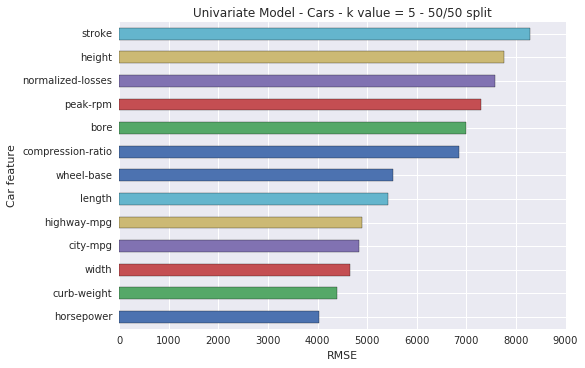

In [16]:
# Create a Series object from the dictionary so 
# we can easily view the results, sort, etc
column_rse_series=pd.Series(column_rmse)
import seaborn as sns
column_rse_series.sort_values().plot.barh()
plt.xlabel('RMSE')
plt.ylabel('Car feature')
plt.title('Univariate Model - Cars - k value = 5 - 50/50 split')
plt.show()

In [17]:
#Modify the knn_train_test() function you wrote to accept a parameter for the k value.
def knn_train_test(df,train_column,target_column):
    #import functions from library
    from sklearn.neighbors import KNeighborsRegressor
    from sklearn.metrics import mean_squared_error
    
    # Randomize order of rows in data frame.
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    # Split full dataset into train and test sets.
    df_rows=rand_df.shape[0]
    train_df = rand_df.iloc[0:int(round(df_rows*(1/2),0))]
    test_df = rand_df.iloc[int(round(df_rows*(1/2),0)):]

    k_values=[1,3,5,7,9]
    rmse_list={}
    for k in k_values:
        #Create an instance of the KNeighborsRegressor class 
        knn = KNeighborsRegressor(n_neighbors=k, algorithm='brute')
        #Train data
        features = [train_column]
        knn.fit(train_df[features],train_df[target_column])
        #Predict data
        predictions=knn.predict(test_df[features])
        #Calculate the RMSE
        mse=mean_squared_error(test_df[target_column],predictions)
        rmse=mse**(1/2)
        rmse_list[k]=rmse
    return rmse_list

#Use this function to train and test univariate models using the different numeric columns in the data set. Which column performed the best using the default k value?
column_rmse={}
features=['normalized-losses', 'wheel-base', 'length', 'width', 'height','curb-weight', 'bore', 'stroke', 'compression-ratio', 'horsepower','peak-rpm', 'city-mpg', 'highway-mpg']
for index,j in enumerate(features):
    rmse_list=knn_train_test(numeric_cars,j,'price')
    column_rmse[j]=rmse_list
print(column_rmse)

{'normalized-losses': {1: 9528.799873525679, 3: 6943.228323500189, 9: 7446.012040501774, 5: 7581.611022979375, 7: 7223.339664425183}, 'wheel-base': {1: 4708.00099998307, 3: 5102.678237535617, 9: 5762.053430927465, 5: 5510.4244296830275, 7: 5489.902950447705}, 'compression-ratio': {1: 7917.579731956047, 3: 6319.886594524997, 9: 6747.419859657354, 5: 6840.976895643827, 7: 6614.376984425625}, 'curb-weight': {1: 5496.150727716825, 3: 5055.228940548997, 9: 4634.055301484907, 5: 4400.6231752215535, 7: 4367.669511999935}, 'highway-mpg': {1: 6308.517418522515, 3: 4686.072257255539, 9: 5274.5968079437935, 5: 4894.959094844207, 7: 5144.27150086394}, 'stroke': {1: 7246.541206358075, 3: 7358.722370438533, 9: 7659.377014744945, 5: 8289.58156846279, 7: 7447.870220457112}, 'height': {1: 8931.134984917195, 3: 8025.141653986966, 9: 7664.919593082149, 5: 7764.001175417297, 7: 7613.249014705291}, 'length': {1: 5026.624922242647, 3: 4712.181683214429, 9: 5409.733405290717, 5: 5422.194353938375, 7: 5364.16

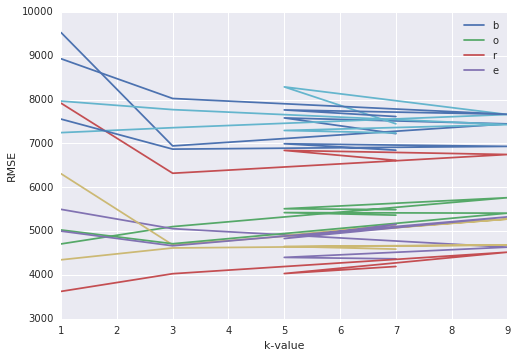

In [18]:
for k,v in column_rmse.items():
    label=list(k)
    x=list(v.keys())
    y=list(v.values())
    plt.plot(x,y)
    plt.xlabel('k-value')
    plt.ylabel('RMSE')
    plt.legend(label)

## 4. Multivariate Model
Let's modify the knn_train_test() function we wrote in the last step to work with multiple columns.

In [19]:
#Modify the knn_train_test() function to accept a list of column names (instead of just a string). 
def knn_train_test(df,train_column,target_column):
    #import functions from library
    from sklearn.neighbors import KNeighborsRegressor
    from sklearn.metrics import mean_squared_error

    # Randomize order of rows in data frame.
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    # Split full dataset into train and test sets.
    df_rows=rand_df.shape[0]
    train_df = rand_df.iloc[0:int(round(df_rows*(1/2),0))]
    test_df = rand_df.iloc[int(round(df_rows*(1/2),0)):]

    #Create an instance of the KNeighborsRegressor class 
    knn = KNeighborsRegressor(n_neighbors=5, algorithm='brute')
    #Train data
    knn.fit(train_df[train_column],train_df[target_column])
    #Predict data
    predictions=knn.predict(test_df[train_column])
    #Calculate the RMSE
    mse=mean_squared_error(test_df[target_column],predictions)
    rmse=mse**(1/2)
    return rmse


In [20]:
#Use the best 2 features from the previous step to train and test a multivariate k-nearest neighbors model using the default k value.
features_rmse={}
all_features=['normalized-losses', 'wheel-base', 'length', 'width', 'height','curb-weight', 'bore', 'stroke', 'compression-ratio', 'horsepower','peak-rpm', 'city-mpg', 'highway-mpg']
two_features=['horsepower','curb-weight']
rmse=knn_train_test(numeric_cars,two_features,'price')
features_rmse['two_features']=rmse

#Use the best 3 features from the previous step to train and test a multivariate k-nearest neighbors model using the default k value.
three_features=['horsepower','curb-weight','width']
rmse=knn_train_test(numeric_cars,three_features,'price')
features_rmse['three_features']=rmse

#Use the best 4 features from the previous step to train and test a multivariate k-nearest neighbors model using the default k value.
four_features=['horsepower','curb-weight','width','city-mpg']
rmse=knn_train_test(numeric_cars,four_features,'price')
features_rmse['four_features']=rmse

#Use the best 5 features from the previous step to train and test a multivariate k-nearest neighbors model using the default k value.
five_features=['horsepower','curb-weight','width','city-mpg','highway-mpg']
rmse=knn_train_test(numeric_cars,five_features,'price')
features_rmse['five_features']=rmse

#Use the best 6 features from the previous step to train and test a multivariate k-nearest neighbors model using the default k value.
six_features=['horsepower','curb-weight','width','city-mpg','highway-mpg','length']
rmse=knn_train_test(numeric_cars,six_features,'price')
features_rmse['six_features']=rmse

#Display all of the RMSE values.
features_rmse_series=pd.Series(features_rmse)
features_rmse_series.sort_values()


two_features      3257.849049
four_features     3280.380731
three_features    3305.940140
five_features     3340.435797
six_features      3628.725527
dtype: float64

## 5. Hyperparameter Tuning

Let's now optimize the model that performed the best in the previous step.

In [21]:
#For the top 3 models in the last step, vary the hyperparameter value from 1 to 25 and plot the resulting RMSE values.
def knn_train_test(df,train_column,target_column):
    #import functions from library
    from sklearn.neighbors import KNeighborsRegressor
    from sklearn.metrics import mean_squared_error
    
    # Randomize order of rows in data frame.
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    # Split full dataset into train and test sets.
    df_rows=rand_df.shape[0]
    train_df = rand_df.iloc[0:int(round(df_rows*(1/2),0))]
    test_df = rand_df.iloc[int(round(df_rows*(1/2),0)):]

    k_values=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]
    rmse_list={}
    for k in k_values:
        #Create an instance of the KNeighborsRegressor class 
        knn = KNeighborsRegressor(n_neighbors=k, algorithm='brute')
        #Train data
        knn.fit(train_df[train_column],train_df[target_column])
        #Predict data
        predictions=knn.predict(test_df[train_column])
        #Calculate the RMSE
        mse=mean_squared_error(test_df[target_column],predictions)
        rmse=mse**(1/2)
        rmse_list[k]=rmse
    return rmse_list

In [24]:
#Use the best 2 features from the previous step to train and test a multivariate k-nearest neighbors model using the default k value.
features_rmse_k25={}
two_features=['horsepower','curb-weight']
rmse=knn_train_test(numeric_cars,two_features,'price')
features_rmse_k25['two_features']=rmse

#Use the best 3 features from the previous step to train and test a multivariate k-nearest neighbors model using the default k value.
three_features_k25=['horsepower','curb-weight','width']
rmse=knn_train_test(numeric_cars,three_features,'price')
features_rmse_k25['three_features']=rmse

#Use the best 4 features from the previous step to train and test a multivariate k-nearest neighbors model using the default k value.
four_features_k25=['horsepower','curb-weight','width','city-mpg']
rmse=knn_train_test(numeric_cars,four_features,'price')
features_rmse_k25['four_features']=rmse

print(features_rmse_k25)

{'two_features': {1: 2812.9984442805426, 2: 2707.557005058908, 3: 3003.861566788863, 4: 3107.1124190761475, 5: 3257.849049435976, 6: 3656.0958933701604, 7: 3776.622550248818, 8: 3989.926548427959, 9: 4106.695501428088, 10: 4292.927729786319, 11: 4446.696147351624, 12: 4471.78201943229, 13: 4535.817875020999, 14: 4547.813945242431, 15: 4626.44623473615, 16: 4616.734968102713, 17: 4629.98034982604, 18: 4595.225142927987, 19: 4602.10047883103, 20: 4609.448817726754, 21: 4645.476509446625, 22: 4653.087023925255, 23: 4698.816175597623, 24: 4738.036840575854, 25: 4760.655676170818}, 'four_features': {1: 2538.6231982266013, 2: 2811.866036800276, 3: 3009.853808093445, 4: 3127.0172577192884, 5: 3280.3807311630976, 6: 3479.747887974269, 7: 3781.5612742414464, 8: 3988.8669577450623, 9: 4024.998621362245, 10: 4042.2681009552048, 11: 4230.245105620831, 12: 4354.291651892587, 13: 4461.345458355279, 14: 4468.029845088927, 15: 4441.791010558032, 16: 4492.754035850986, 17: 4597.262222692034, 18: 4615.4

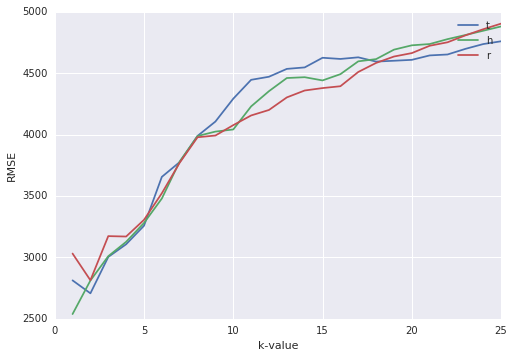

In [23]:
for k,v in features_rmse_k25.items():
    label=list(k)
    x=list(v.keys())
    y=list(v.values())
    plt.plot(x,y)
    plt.xlabel('k-value')
    plt.ylabel('RMSE')
    plt.legend(label)

Which k value is optimal for each model? 
<li>two_features=['horsepower','curb-weight'] => k value = 2
<li>three_features_k25=['horsepower','curb-weight','width'] => k value = 2
<li>four_features_k25=['horsepower','curb-weight','width','city-mpg'] => k value = 1
Summarizing, the model that takes the four features in combination with a k value that equals 1 showed the lowest RMSE (2538).

How different are the k values and what do you think accounts for the differences?
I guess it's because of the variance of the similarities. The